In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats
from ydata_profiling import ProfileReport

data = pd.read_csv("/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/data_processed.csv")


In [2]:
data

,CPT104,GEN_TENSIONE,IC113,PT212,TOV_POS,TT103,TT105,TT112,TT119,TT124,TT126,TT128,TT129,TT130,XT100,XT101,Fault
0,0.883274,-0.814951,0.854823,-0.025783,1.765200,-0.820087,0.965965,0.773948,0.805135,1.337211,-1.128067,-0.068788,-1.422122,-0.058423,1.342956,0.531226,0
1,0.845848,-0.051364,0.816195,-0.061000,1.765200,-0.924606,0.671964,0.731663,0.785257,1.034742,-1.116213,-0.017286,-1.347566,-0.090250,1.249340,0.821848,0
2,0.368861,-0.034452,0.355595,-0.075653,1.925981,-0.404904,0.550904,0.533631,0.483939,0.279106,-1.101581,-0.718582,-1.245898,-0.334857,1.062110,-0.340642,0
3,0.660309,0.695733,0.626271,-0.100589,1.675162,-0.548918,0.397952,0.606220,0.652213,0.666726,-1.040273,-0.445098,-1.421856,-0.229914,1.331254,0.821848,0
4,0.810014,0.620051,0.782665,-0.072172,1.874531,-0.718459,0.341801,0.750339,0.775023,0.659528,-1.247719,-0.121188,-1.336003,-0.161800,1.459975,1.693716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1
1588,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1
1589,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1
1590,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1


In [3]:
data = data.drop_duplicates()

In [4]:
data

,CPT104,GEN_TENSIONE,IC113,PT212,TOV_POS,TT103,TT105,TT112,TT119,TT124,TT126,TT128,TT129,TT130,XT100,XT101,Fault
0,0.883274,-0.814951,0.854823,-0.025783,1.765200,-0.820087,0.965965,0.773948,0.805135,1.337211,-1.128067,-0.068788,-1.422122,-0.058423,1.342956,0.531226,0
1,0.845848,-0.051364,0.816195,-0.061000,1.765200,-0.924606,0.671964,0.731663,0.785257,1.034742,-1.116213,-0.017286,-1.347566,-0.090250,1.249340,0.821848,0
2,0.368861,-0.034452,0.355595,-0.075653,1.925981,-0.404904,0.550904,0.533631,0.483939,0.279106,-1.101581,-0.718582,-1.245898,-0.334857,1.062110,-0.340642,0
3,0.660309,0.695733,0.626271,-0.100589,1.675162,-0.548918,0.397952,0.606220,0.652213,0.666726,-1.040273,-0.445098,-1.421856,-0.229914,1.331254,0.821848,0
4,0.810014,0.620051,0.782665,-0.072172,1.874531,-0.718459,0.341801,0.750339,0.775023,0.659528,-1.247719,-0.121188,-1.336003,-0.161800,1.459975,1.693716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,-0.981672,-2.412310,-0.882095,2.325590,-2.440836,-1.912472,-1.373244,-1.492143,0.219621,-1.639694,-1.567038,0.527708,1.670573,-1.361629,-0.821897,0.531226,1
1562,-1.429991,0.196823,-1.372008,2.349716,-2.524443,-1.615293,-0.981093,-1.765934,-0.245444,-1.772933,-1.639829,-0.515263,1.099240,-1.335408,-0.903811,0.821848,1
1563,-1.036617,0.724484,-0.907838,2.454072,-2.923180,-2.398457,-1.429619,-1.025958,0.528615,-1.716115,-1.362185,1.150943,2.123626,-1.442763,-0.915513,0.821848,1
1564,-1.515196,-0.362126,-1.461387,2.264304,-1.720537,-2.264077,-3.057296,-1.627453,-0.023441,-2.706375,-1.215305,-0.250752,1.312543,-1.687069,-1.020830,-0.631264,1


In [5]:
profile = ProfileReport(data, title="Profiling Report", explorative=True)

In [ ]:
profile.to_notebook_iframe()

In [12]:
plt.figure(figsize=(12, 8))  # Set the figure size

# Loop through the numerical columns and create displot for each
for column in data.select_dtypes(include=['number']).columns:
    sns.displot(data=data, x=column, kde=True, rug=True)
    
# Add labels and titles
plt.xlabel("Value")
plt.ylabel("Density")
plt.suptitle("Kernel Density Estimate for Numerical Columns", y=1.02)
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/tesipy/lib/python3.11/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
/var/folders/5m/sbp_l7cd6hbckv_s5zj7jt6w0000gn/T/ipykernel_47505/3450859961.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [7]:
plt.figure(figsize=(15, 6))
sns.boxplot(data.drop('Fault', axis=1))

<Axes: >

In [14]:
data_0 = data[data['Fault'] == 0]
data_1 = data[data['Fault'] == 1]
data_0.tail()

,CPT104,GEN_TENSIONE,IC113,PT212,TOV_POS,TT103,TT105,TT112,TT119,TT124,TT126,TT128,TT129,TT130,XT100,XT101,Fault
950,-1.120229,1.376027,-1.097923,-0.010805,-0.209193,0.851723,1.057377,-0.252858,-0.506416,-0.626462,-0.402932,0.643454,1.665789,-0.433351,-0.716580,0.240603,0
951,-1.136155,1.359960,-1.119580,-0.087473,-0.267075,0.315645,0.676456,-0.435033,-0.634344,-0.922499,-0.156034,0.485178,1.627913,-0.495497,-0.751686,-0.050019,0
952,-1.137748,-0.168904,-1.121990,-0.017606,0.189544,-0.282565,1.513315,-0.655265,-0.747510,-0.318480,-0.424602,0.446237,1.600004,-0.496763,-1.184656,0.531226,0
953,-1.142525,0.072095,-1.123474,0.018016,0.408207,0.831493,1.332288,-0.295495,-0.536332,-0.476989,-0.581669,0.582082,1.711772,-0.427444,-0.868705,0.240603,0
954,-1.302583,1.007763,-1.294135,-0.022625,0.774788,0.533833,1.115324,-0.460052,-0.631785,-0.725549,-0.586855,0.307162,1.616749,-0.533955,-0.505946,0.240603,0


In [15]:
plt.figure(figsize=(15, 6))
sns.kdeplot(data_0.drop('Fault', axis=1))

<Axes: ylabel='Density'>

<AxesSubplot: xlabel='XT100', ylabel='Density'>

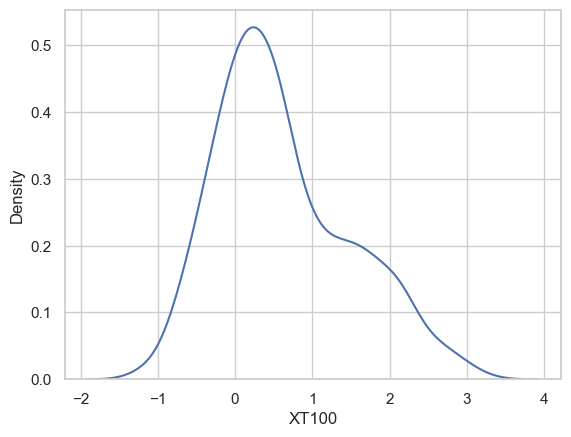

In [15]:
sns.kdeplot(data_0['XT100'])

In [16]:
stats.shapiro(data_0['XT100'])

ShapiroResult(statistic=0.9615543484687805, pvalue=2.9856224101083156e-14)